# Medical Image Analysis workshop - IT-IST
## Reading DICOM Images and Metadata, other formats, Writing and Viewing

Lets first start with reading a DICOM series (group of dicom images belonging to same sequence acquisition). This could be 3D or 4D (3D+time or 3D+parameters).

In this case, pydicom, SimpleITK and ITK allow you to easily read the DICOM series.

The DICOM series is contained in the folder T1w_postContrast_Neuro and whithin you can find several .dcm files, each corresponding to a 2D slice of the 3D volume. 

In [1]:
!ls ./T1w_postContrast_Neuro/

000000.dcm 000026.dcm 000052.dcm 000078.dcm 000104.dcm 000130.dcm 000156.dcm
000001.dcm 000027.dcm 000053.dcm 000079.dcm 000105.dcm 000131.dcm 000157.dcm
000002.dcm 000028.dcm 000054.dcm 000080.dcm 000106.dcm 000132.dcm 000158.dcm
000003.dcm 000029.dcm 000055.dcm 000081.dcm 000107.dcm 000133.dcm 000159.dcm
000004.dcm 000030.dcm 000056.dcm 000082.dcm 000108.dcm 000134.dcm 000160.dcm
000005.dcm 000031.dcm 000057.dcm 000083.dcm 000109.dcm 000135.dcm 000161.dcm
000006.dcm 000032.dcm 000058.dcm 000084.dcm 000110.dcm 000136.dcm 000162.dcm
000007.dcm 000033.dcm 000059.dcm 000085.dcm 000111.dcm 000137.dcm 000163.dcm
000008.dcm 000034.dcm 000060.dcm 000086.dcm 000112.dcm 000138.dcm 000164.dcm
000009.dcm 000035.dcm 000061.dcm 000087.dcm 000113.dcm 000139.dcm 000165.dcm
000010.dcm 000036.dcm 000062.dcm 000088.dcm 000114.dcm 000140.dcm 000166.dcm
000011.dcm 000037.dcm 000063.dcm 000089.dcm 000115.dcm 000141.dcm 000167.dcm
000012.dcm 000038.dcm 000064.dcm 000090.dcm 000116.dcm 000142.dcm 000168.dcm

Each of these DICOM files contain both metadata (scanner information, acquisition settings, patient info, slice location, etc.), as well as, the pixel/voxel data (2D - pixel; 3D - voxel)

In [2]:
import os
cT1w_data_dir = './T1w_postContrast_Neuro/'
dcm_filename = '000120.dcm'
dcm_filepath = os.path.join(cT1w_data_dir, dcm_filename)

### Reading DICOM Image and Metadata using pydicom

Pydicom was design to provide a pythonic way to work with DICOM files that can include medical image, reports, and radiotherapy objects. Usually it is used to allow DICOM metadata reading and modification (anonymization/de-identification).

Let's see how to look a DICOM file metadata and obtain the patient name, age, sequence parameters like echo time, repetition time, and slice thickness.

In [3]:
import pydicom
from pydicom.filereader import read_dicomdir

ds = pydicom.dcmread(dcm_filepath)

Print an overview of the DICOM metada. Notice it is composed by a tag (xxxx, xxxx), tag name (e.g. Group Length), value representation (e.g. UI - unique id; TM - time; DA - data; CS - code string, etc.), and value

In [4]:
ds

(0008, 0000) Group Length                        UL: 486
(0008, 0005) Specific Character Set              CS: 'ISO_IR 100'
(0008, 0008) Image Type                          CS: ['ORIGINAL', 'PRIMARY', 'M', 'ND', 'NORM']
(0008, 0016) SOP Class UID                       UI: MR Image Storage
(0008, 0018) SOP Instance UID                    UI: 1.3.6.1.4.1.9328.50.16.281654496659260155563614379658381155324
(0008, 0020) Study Date                          DA: '19040901'
(0008, 0023) Content Date                        DA: '19040901'
(0008, 0030) Study Time                          TM: ''
(0008, 0032) Acquisition Time                    TM: '074955.247510'
(0008, 0033) Content Time                        TM: ''
(0008, 0050) Accession Number                    SH: '2819497684894126'
(0008, 0060) Modality                            CS: 'MR'
(0008, 0070) Manufacturer                        LO: 'SIEMENS'
(0008, 0090) Referring Physician's Name          PN: ' '
(0008, 1010) Station Name           

Lets retrieve patient name using the corresponding dicom metada tag name (without spaces!!!)

In [5]:
ds.PatientName # de-identified patient 

'281949'

Or alternatively using the corresponding DICOM metadata tag

In [6]:
ds[0x10,0X10].value

'281949'

In [7]:
ds.PatientBirthDate # empty due to anonymization

''

In [8]:
ds.EchoTime

"4.11"

In [9]:
ds.RepetitionTime

"8.6"

In [10]:
ds.SliceThickness

"1.0"

Lets view slice

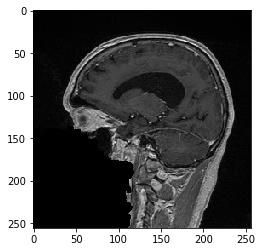

In [11]:
%matplotlib inline
# %matplotlib notebook 
import numpy as np
import matplotlib.pyplot as plt

slice_data = ds.pixel_array

plt.imshow(slice_data, cmap="gray")
plt.show()

### Reading DICOM Image and Metadata using SimpleITK

We can also obtain metadata information using SimpleITK. SimpleITK offers additional function for filtering, segmentation and registeration of the images.

In [12]:
import SimpleITK as sitk

reader = sitk.ImageFileReader()

reader.SetFileName(dcm_filepath)
reader.LoadPrivateTagsOn();

reader.ReadImageInformation();

But its interface to obtain the metadata is a bit different. Lets list the tags to have an idea how to access them

In [13]:
print(reader.GetMetaDataKeys())

('0008|0000', '0008|0005', '0008|0008', '0008|0016', '0008|0018', '0008|0020', '0008|0023', '0008|0030', '0008|0032', '0008|0033', '0008|0050', '0008|0060', '0008|0070', '0008|0090', '0008|1010', '0008|1030', '0008|103e', '0008|1090', '0008|1150', '0008|1155', '0010|0000', '0010|0010', '0010|0020', '0010|0030', '0010|0040', '0012|0000', '0012|0062', '0012|0063', '0013|0000', '0013|0010', '0013|1010', '0013|1013', '0018|0000', '0018|0010', '0018|0015', '0018|0020', '0018|0021', '0018|0022', '0018|0023', '0018|0024', '0018|0025', '0018|0050', '0018|0080', '0018|0081', '0018|0083', '0018|0084', '0018|0085', '0018|0086', '0018|0087', '0018|0089', '0018|0091', '0018|0093', '0018|0094', '0018|0095', '0018|1000', '0018|1020', '0018|1030', '0018|1041', '0018|1200', '0018|1201', '0018|1251', '0018|1312', '0018|1314', '0018|1315', '0018|1316', '0018|1318', '0018|5100', '0020|0000', '0020|000d', '0020|000e', '0020|0010', '0020|0011', '0020|0012', '0020|0013', '0020|0032', '0020|0037', '0020|0052'

Lets get the patient name, age, sequence parameters like echo time, repetition time, and slice thickness using SimpleITK

In [14]:
print('Patient\'s Name', reader.GetMetaData('0010|0010'))
print('Slice Thickness', reader.GetMetaData('0018|0050'))
print('Repetition Time', reader.GetMetaData('0018|0080'))
print('Echo Time', reader.GetMetaData('0018|0081'))

Patient's Name 281949
Slice Thickness 1 
Repetition Time 8.6 
Echo Time 4.11


Similar to what we did using pydicom, lets now read the image and plot it

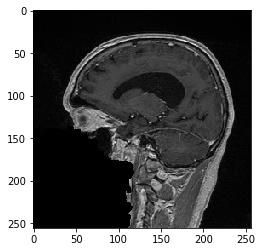

In [15]:
%matplotlib inline
image_slice = reader.Execute() # this is not a numpy array, but an simple itk image object - we will see this later

image_slice_np = sitk.GetArrayFromImage(image_slice)[0,:,:]

plt.imshow(sitk.GetArrayFromImage(image_slice)[0,:,:], cmap="gray")
plt.show()

### Reading DICOM Image/Series and Metadata using ITK

Although ITK is a C++ library it contains a wrapping in python which we will use.

This wrapping offers all the functionalities provived by the C++ implementation.

As you will see ITK is more verbose than SimpleITK but it more customizable and offers additional filters.

Lets get the patient name, age, sequence parameters like echo time, repetition time, and slice thickness using ITK

In [16]:
import itk

namesGenerator = itk.GDCMSeriesFileNames.New()
namesGenerator.SetUseSeriesDetails(True)
namesGenerator.AddSeriesRestriction("0008|0021")
namesGenerator.SetGlobalWarningDisplay(False)
namesGenerator.SetDirectory(cT1w_data_dir)

seriesUIDs = namesGenerator.GetSeriesUIDs() #this gets the series UID that will allows us to separate two or more series in a folder 

uid = seriesUIDs[0]

dicom_names = namesGenerator.GetFileNames(uid)

PixelType = itk.ctype('signed short')
Dimension = 3

ImageType = itk.Image[PixelType, Dimension]

reader_itk = itk.ImageSeriesReader[ImageType].New()
dicomIO = itk.GDCMImageIO.New()
reader_itk.SetImageIO(dicomIO)
reader_itk.SetFileNames(dicom_names)
reader_itk.ForceOrthogonalDirectionOff()
reader_itk.Update()

metad = dicomIO.GetMetaDataDictionary()
# metad['0010|0010']
print('Patient\'s Name', metad['0010|0010'])
print('Slice Thickness', metad['0018|0050'])
print('Repetition Time', metad['0018|0080'])
print('Echo Time', metad['0018|0081'])

Patient's Name 281949
Slice Thickness 1 
Repetition Time 8.6 
Echo Time 4.11


But we actually read the 3D volume represented by all the .dcm files. Let see what the object ITK image contains.

In [17]:
image_itk = reader_itk.GetOutput() # this loads all .dcm files and creates a 3D volume corresponding to the acquisition
print(image_itk) # this is not just voxel values, it contains image information like size, orientation, origin, etc.

Image (0x7fad3fd25cb0)
  RTTI typeinfo:   itk::Image<short, 3u>
  Reference Count: 2
  Modified Time: 5213
  Debug: Off
  Object Name: 
  Observers: 
    none
  Source: (0x7fad3fd248e0) 
  Source output name: Primary
  Release Data: Off
  Data Released: False
  Global Release Data: Off
  PipelineMTime: 53
  UpdateMTime: 5214
  RealTimeStamp: 0 seconds 
  LargestPossibleRegion: 
    Dimension: 3
    Index: [0, 0, 0]
    Size: [256, 256, 176]
  BufferedRegion: 
    Dimension: 3
    Index: [0, 0, 0]
    Size: [256, 256, 176]
  RequestedRegion: 
    Dimension: 3
    Index: [0, 0, 0]
    Size: [256, 256, 176]
  Spacing: [1, 1, 1]
  Origin: [86.1441, -139.893, 128]
  Direction: 
0 0 -1
1 0 0
0 -1 0

  IndexToPointMatrix: 
0 0 -1
1 0 0
0 -1 0

  PointToIndexMatrix: 
0 1 0
0 0 -1
-1 0 0

  Inverse Direction: 
0 1 0
0 0 -1
-1 0 0

  PixelContainer: 
    ImportImageContainer (0x7fad3fd24a90)
      RTTI typeinfo:   itk::ImportImageContainer<unsigned long, short>
      Reference Count: 1
      Mod

## Viewing 3D volumes and slices in jupyter lab

Using ITK and ITK Widgets it is possible visualize the 3D volume, change slices, windowing, view, among others.

In [18]:
import itkwidgets as itkw
itkw.view(image_itk)

Viewer(geometries=[], gradient_opacity=0.22, point_sets=[], rendered_image=<itkImagePython.itkImageSS3; proxy …

Change colormap/CLUT (Color Look Up Table)

In [21]:
itkw.view(image_itk, cmap='Grayscale')

Viewer(cmap='Grayscale', gradient_opacity=0.22, rendered_image=<itkImagePython.itkImageSS3; proxy of <Swig Obj…

You can also request the anatomical plane you wish to view (command mode: {'x', 'y', 'z', 'v' - default})

In [22]:
itkw.view(image_itk, cmap='Grayscale', mode='x')

Viewer(cmap='Grayscale', gradient_opacity=0.22, mode='x', rendered_image=<itkImagePython.itkImageSS3; proxy of…

Or request the slicing planes on you volume rendering (command slicing_planes: {True, False - default})

In [23]:
itkw.view(image_itk, cmap='Grayscale', slicing_planes=True)

Viewer(cmap='Grayscale', gradient_opacity=0.22, rendered_image=<itkImagePython.itkImageSS3; proxy of <Swig Obj…

Finally we will save the 3D volume in a single file for easier handling in the next notebooks.

In [24]:
writer = itk.ImageFileWriter[ImageType].New()
outFileName = './cT1wNeuro.nrrd'
writer.SetFileName(outFileName)
writer.UseCompressionOn()
writer.SetInput(image_itk)
print('Writing: ' + outFileName)
writer.Update()


Writing: ./cT1wNeuro.nrrd
